**Objetivo:** Estudar como as linhas espectrais da molécula de HCl na banda 2-0 se alargam em função da temperatura.


 **1.** Verificar se os espectros simulados pelo Hitran provê os mesmos coeficientes de auto-alargamento em função da pressão estudados durante a graduação.

 **2.** Simular espectros com as mesmas pressões, mas em temperaturas diferentes e verificar o que acontece com os coeficientes de auto-alargamento em cada temperatura
 
 **3.** Fixar uma pressão e verificar como esse coeficiente varia somente na temperatura.

 **4.** Estudar uma maneira de determinar a dependência entre pressão e temperatura.

 **5.** Modelar matematicamente em termos de temperatura e pressão

 **6.** Validar esse modelo em dados reais

 **7.** Desenvolver modelos de Machine Learning para processamento de espectros 

# Importando pacotes

In [1]:
from SpectraGenerator.spectragenerator import SpectraGenerator
from SpectraProcessing.spectraprocessing import branchClassification, plotSpectrum
from SpectraFit.spectrafit import separa_pontos_manual,fit_raia

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


HAPI version: 1.2.2.3
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

# Simulando espectros e processando espectros

Uma banda espectral é formada por linhas/raias espectrais, essas linhas são provenientes das transições de energias rotacionais em uma molécula. Essas transições podem ser categorizadas por Ramas denominadas por rama R, rama P ou  rama Q. No caso da banda 2-0 do HCl, temos somente as Ramas R e P. Cada linha, além da categorização da rama, tem também um valor de J associado, para o HCl temos:

R = 0, 1, 2, 3, 4...

P = 1, 2, 3, 4...

Além do valor de J, podemos introduzir uma outra variável denotada por m, onde

m = -J, se for rama P,

m = J + 1, se for rama R

Ao simularmos um espectro, é necessário aplicarmos um pré-processamento para organizarmos os dados obtidos, visamos nessa parte categorizar as transições (R/P) e definir seus valores de J e m. 

Após a organização das linhas, precisaremos obter os coeficientes de auto-alargamento, e para isso será necessário obter a largura de cada raia espectral. Esse parâmetro será obtido mediante o ajuste não linear de cada linha espectral pelo perfil de Voigt. No meu tcc eu demonstrei que o perfil de Voigt é o melhor perfil que se ajusta nas linhas do HCl, além disso, o perfil de Voigt é um grande coringa, pois leva em consideração os efeitos simultâneos de colisão e efeito doppler.

**Tarefas:**

**1.** Identificar as raias espectrais

**2.** Categorizar as linhas em rama P ou rama R

**3.** Indicar a numeração de cada linha referente  a sua rama

**4.** Separar a raia do espectro.

**5.** Ajustar a linha utilizando o perfil de Voigt.

**6.** Armazenar todos os parâmetros obtidos do ajuste em um dataset.

**7.** Fazer isso para espectros em diferentes pressões e temperaturas.


Inicializando
Using SpectraGenerator/hitran_database

H35Cl
                     Lines parsed: 334
H37Cl
                     Lines parsed: 340
{'air': 0, 'self': 1}


4.722406 seconds elapsed for abscoef; nlines = 334


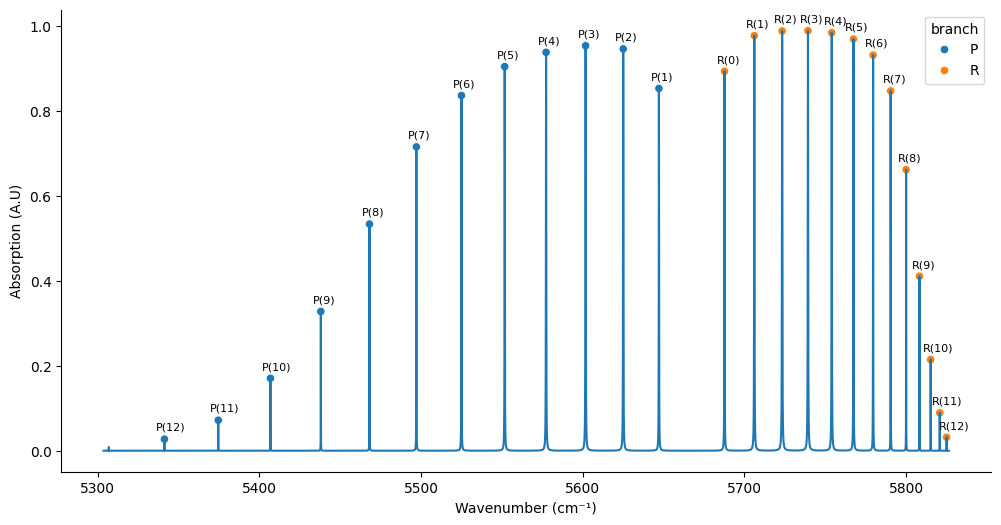

In [24]:
s = SpectraGenerator()

pressure = 0.270  #atm
temperature = 296 # Kelvin

optical_length = 10 #cm

#Simulando o espectro
s.simulateSpectra('H35Cl',{'air':0, 'self':1}, {'l':optical_length,'p':pressure,'T':temperature})

# Organizando as linhas
lines = branchClassification(s.spectra, findPeaksParams={'height':0},thresoldBranch=5665)

# Realizando o fit das linhas pelo perfil de Voigt

plotSpectrum(s.spectra,lines)

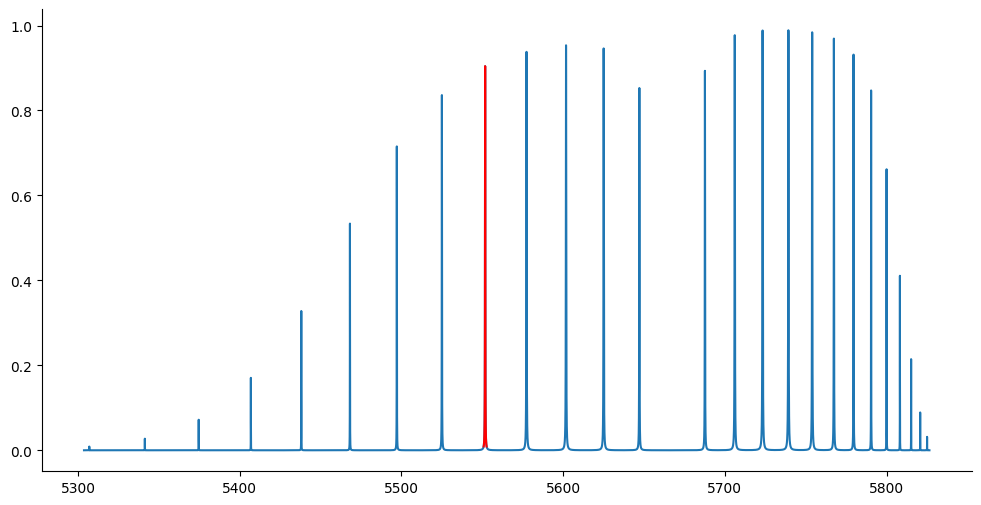

In [27]:
x,y = separa_pontos_manual(s.spectra,lines.loc[7,'center'],lines.loc[7,'intensity'],0.01)

plt.plot(s.spectra['wavenumbers'],s.spectra['absorption'])
plt.plot(x,y,c='red')

data: <class 'numpy.ndarray'>, ex: <class 'numpy.ndarray'>, chute_centro: <class 'numpy.float64'>, chute_sigma: <class 'float'>, chute_gama: <class 'float'>


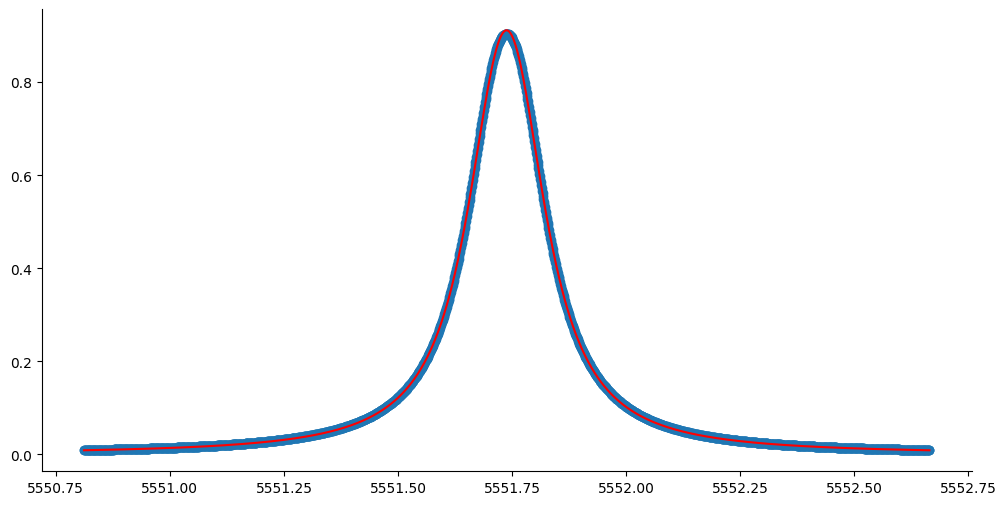

In [28]:
chute= 8e-3
final, result, sucessful = fit_raia(y, x, lines.loc[7,'center'],chute, chute, vgamma=True, vsigma=True)

plt.scatter(x=x,y=y)
plt.plot(x,final,c='red')
result

In [29]:
result.rsquared

np.float64(0.9999496797536002)